<a href="https://colab.research.google.com/github/anurag-guvi/Breast-Cancer-Prediction/blob/main/Breast_Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary libraries

In [7]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data

In [8]:
df = pd.read_csv('cancer.csv')

##Exploratory Data Analysis (EDA):

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.shape

(569, 33)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [13]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [14]:
df.drop("Unnamed: 32", axis=1, inplace=True)

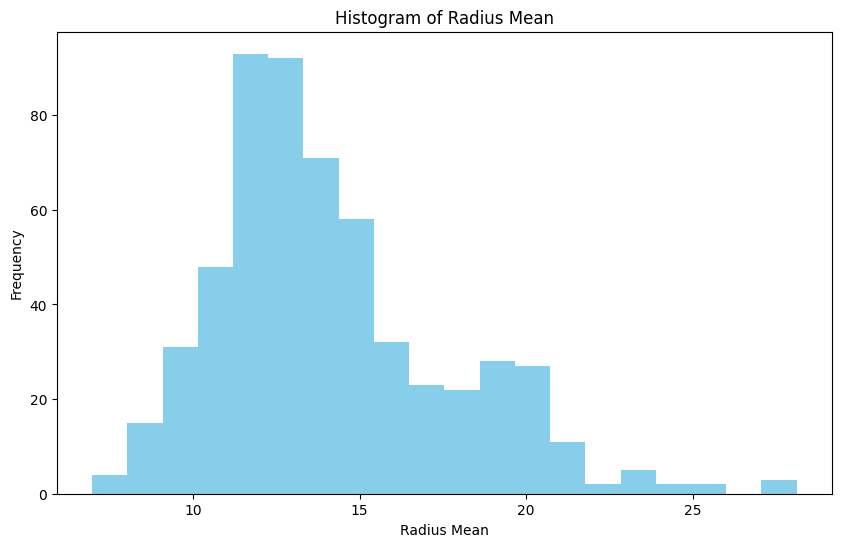

In [15]:
# Visualize Numerical Variables: Histograms
plt.figure(figsize=(10, 6))
plt.hist(df['radius_mean'], bins=20, color='skyblue')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Mean')
plt.show()

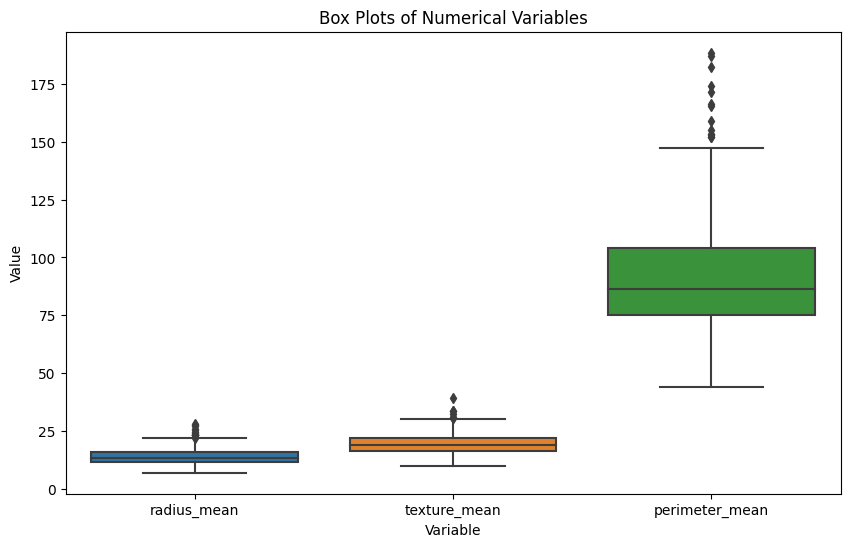

In [16]:
# Visualize Numerical Variables: Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['radius_mean', 'texture_mean', 'perimeter_mean']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Box Plots of Numerical Variables')
plt.show()

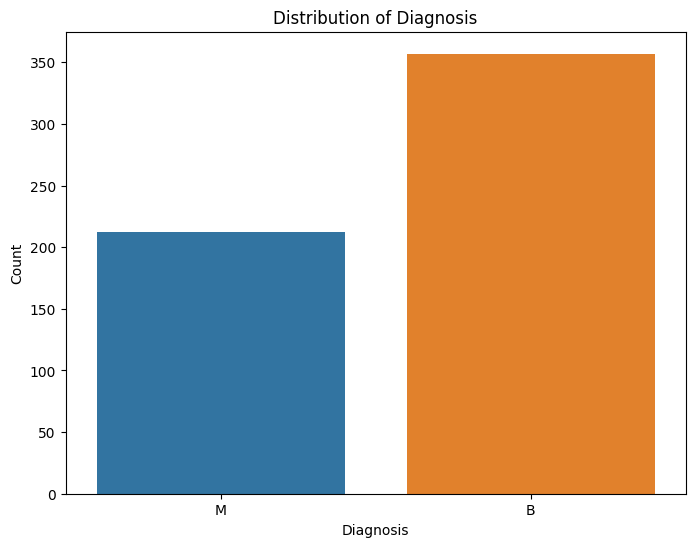

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')
plt.show()

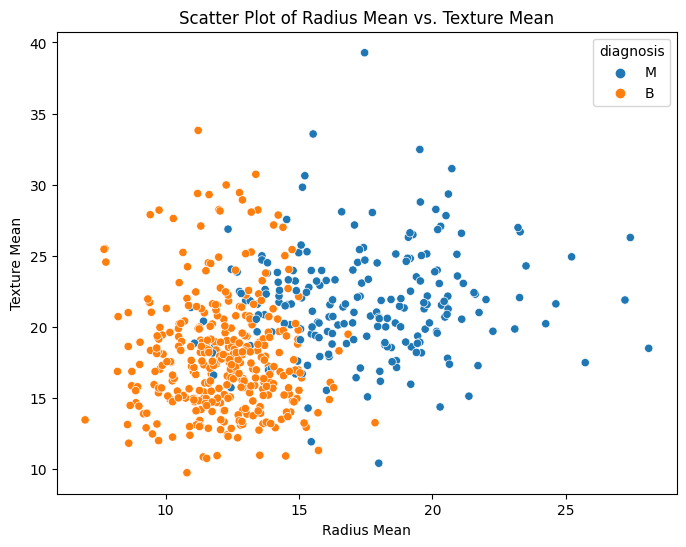

In [18]:
# Visualize Relationships: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Scatter Plot of Radius Mean vs. Texture Mean')
plt.show()

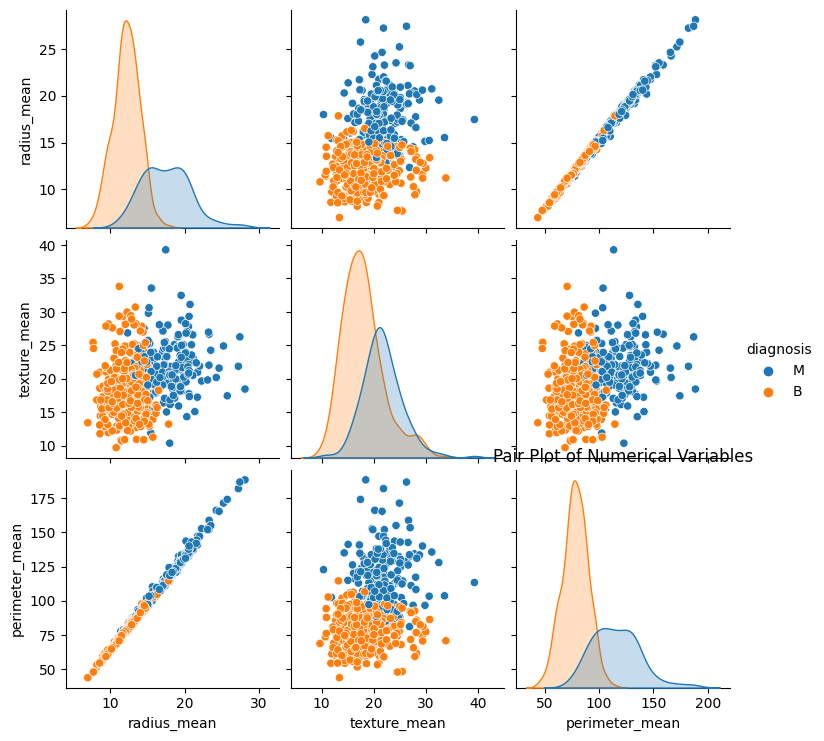

In [19]:
# Additional Visualizations: Pair Plot
sns.pairplot(data=df[['radius_mean', 'texture_mean', 'perimeter_mean', 'diagnosis']], hue='diagnosis')
plt.title('Pair Plot of Numerical Variables')
plt.show()

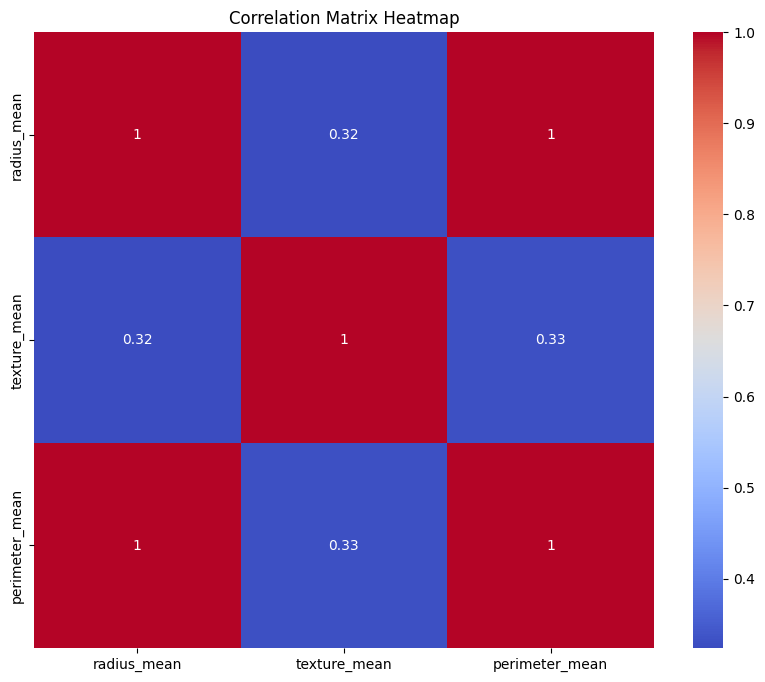

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['radius_mean', 'texture_mean', 'perimeter_mean']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
correlation_matrix = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']].corr()
print(correlation_matrix)

                radius_mean  texture_mean  perimeter_mean  area_mean
radius_mean        1.000000      0.323782        0.997855   0.987357
texture_mean       0.323782      1.000000        0.329533   0.321086
perimeter_mean     0.997855      0.329533        1.000000   0.986507
area_mean          0.987357      0.321086        0.986507   1.000000


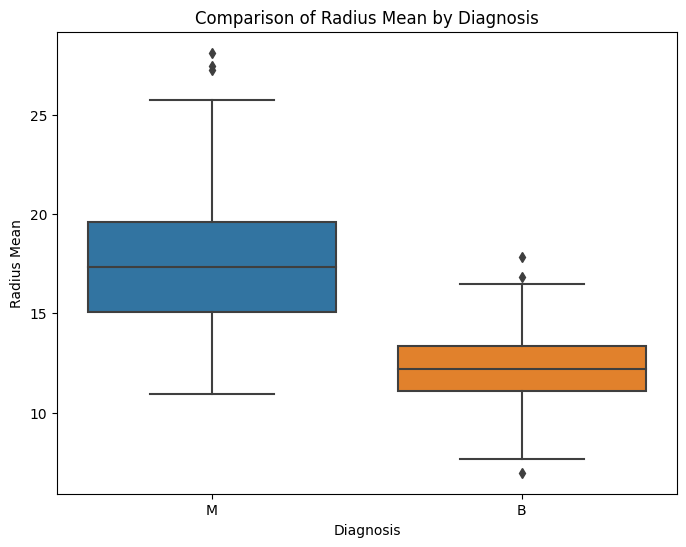

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='diagnosis', y='radius_mean')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.title('Comparison of Radius Mean by Diagnosis')
plt.show()

In [23]:
mean_texture_by_diagnosis = df.groupby('diagnosis')['texture_mean'].mean()
print(mean_texture_by_diagnosis)

diagnosis
B    17.914762
M    21.604906
Name: texture_mean, dtype: float64


# Preprocessing
Handle Missing Values

# Split train and test

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(['diagnosis'], axis=1)

y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 31)
y_train shape: (455,)
X_test shape: (114, 31)
y_test shape: (114,)


# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)

In [26]:
y_test = label_encoder.transform(y_test)

*italicized text*

# Train Model
# Prediction
# Accuracy

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [28]:
rf = RandomForestClassifier()

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = rf.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_test)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)
print("Auc_roc", auc_roc)

Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1_score: 0.9523809523809524
Auc_roc 1.0


In [32]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [33]:
svm = LinearSVC(penalty='l1',
                loss='squared_hinge',
                dual=False,
                tol=0.00001)

In [34]:
svm.fit(X_train, y_train)

LinearSVC(dual=False, penalty='l1', tol=1e-05)

In [35]:
y_pred = svm.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_test)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)
print("Auc_roc", auc_roc)

Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9302325581395349
F1_score: 0.963855421686747
Auc_roc 1.0


In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [38]:
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9302325581395349
Specificity: 1.0
